# Hello Quantum - Bell State

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
IBMQ.load_accounts()

In [2]:
from qiskit import QuantumRegister, ClassicalRegister

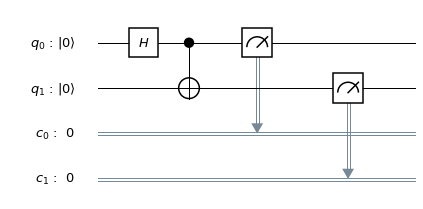

In [3]:
## Define a two-qubit quantum circuit
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q, c)

## Apply the quantum gates
circuit.h(q[0])
circuit.cx(q[0], q[1])

## Finish off with the measurements
circuit.measure(q, c)

## Draw the circuit
%matplotlib inline
circuit.draw(output="mpl")

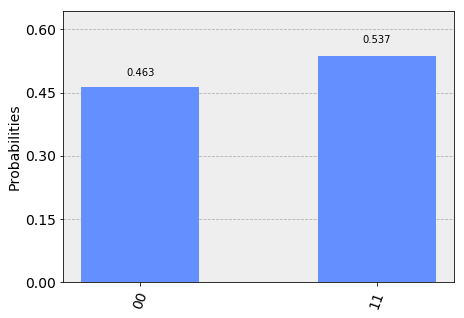

In [4]:
## First, simulate the circuit

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()

## Then, plot a histogram of the results
counts = result.get_counts(circuit)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [7]:
for backend in IBMQ.backends(simulator=False):
    print(backend.status())

BackendStatus(backend_name='ibmq_20_tokyo', backend_version='1.2.4', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmq_poughkeepsie', backend_version='1.2.0', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmqx4', backend_version='1.0.0', operational=True, pending_jobs=32, status_msg='active')
BackendStatus(backend_name='ibmqx2', backend_version='1.0.0', operational=True, pending_jobs=133, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='1.0.0', operational=True, pending_jobs=24, status_msg='active')


In [8]:
# Next, find the least-busy IBM device
from qiskit.providers.ibmq import least_busy
lb_device = least_busy(IBMQ.backends())
print(lb_device)

ibmq_20_tokyo


In [9]:
# And run the circuit on that device
job = execute(circuit, backend=lb_device, shots=1024)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


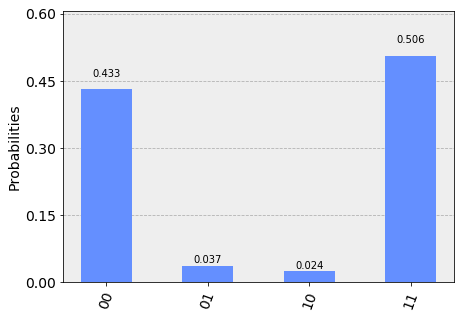

In [10]:
result = job.result()
# Finally, plot a histogram of the results
counts = result.get_counts(circuit)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)